In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('./creditcardfraud_normalised.csv')
df.shape

(284807, 30)

In [30]:
df = df[:10000]

In [31]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [32]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.954185,0.770233,0.853118,0.263640,0.765404,0.264358,0.264919,0.784691,0.490415,0.504108,...,0.560641,0.502909,0.664940,0.385109,0.582798,0.443113,0.416613,0.313183,0.002453,0.00380
std,0.025851,0.013803,0.020086,0.063889,0.007963,0.013144,0.006564,0.013506,0.039795,0.022625,...,0.014731,0.029440,0.007244,0.080099,0.024034,0.091931,0.007584,0.005403,0.007181,0.06153
min,0.488205,0.402097,0.568886,0.045465,0.549673,0.026782,0.103621,0.531883,0.244729,0.235755,...,0.376604,0.112240,0.440527,0.043693,0.433233,0.206798,0.269290,0.241910,0.000000,0.00000
25%,0.941079,0.765060,0.844567,0.224693,0.761385,0.256686,0.262052,0.783340,0.465221,0.494479,...,0.557158,0.484391,0.662848,0.338061,0.569030,0.371874,0.414952,0.312804,0.000195,0.00000
50%,0.951960,0.770303,0.853778,0.261676,0.764688,0.261486,0.265017,0.785524,0.490521,0.501672,...,0.559492,0.503651,0.664753,0.393011,0.584699,0.432450,0.416427,0.313446,0.000621,0.00000
75%,0.977845,0.776774,0.865190,0.301830,0.768215,0.268101,0.268258,0.788331,0.514670,0.512328,...,0.562007,0.521576,0.666646,0.437600,0.598061,0.503266,0.418741,0.314690,0.001984,0.00000
max,0.991600,0.858383,0.908491,0.715747,0.995272,0.478107,0.474334,0.839667,0.820797,0.762376,...,0.925623,0.721563,0.871507,0.813460,0.888044,1.000000,0.568868,0.411764,0.300198,1.00000


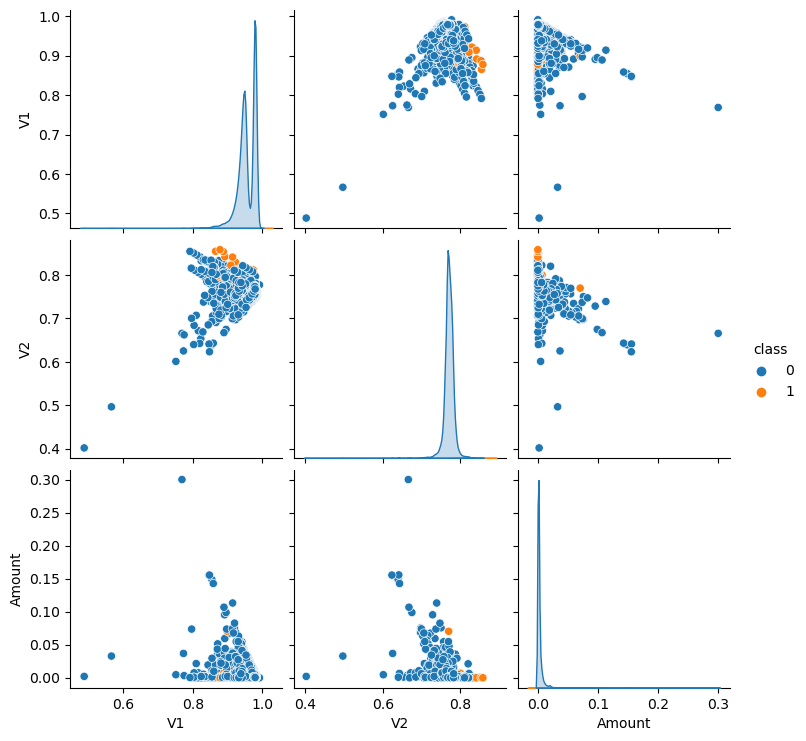

In [33]:
sns.pairplot(df[['V1', 'V2', 'Amount', 'class']], hue='class')

Split the data into input and output


In [34]:
X = df.drop('class', axis=1)
y = df['class']

Split into train and test


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

3. Apply Outlier Detection Algorithms


In [36]:
pip install pyod


Note: you may need to restart the kernel to use updated packages.


In [37]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest

In [38]:
classifiers = {
    'K Nearest Neighbors (KNN)': KNN(),
    'Average KNN': KNN(method='mean'),
    'Angle-based Outlier Detector (ABOD)': ABOD(),
    'Cluster-based Local Outlier Factor (CBLOF)': CBLOF(),
    'Isolation Forest': IForest(),
}

In [39]:
for clf_name, clf in classifiers.items():
    clf.fit(X_train)

In [40]:
outlier_scores = np.zeros((len(X_test), len(classifiers)))

In [41]:
for i, clf in enumerate(classifiers.values()):
    outlier_scores[:, i] = clf.decision_function(X_test)

In [42]:
ensemble_scores = np.mean(outlier_scores, axis=1)

In [43]:
y_pred = np.where(ensemble_scores > 0, 1, 0)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
print(
    f"Classification Report: \n{classification_report(y_true=y_test, y_pred=y_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2492
           1       0.00      0.00      0.00         8

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500



In [46]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(f"Confustion Matrix:\n {cm}")

Confustion Matrix:
 [[2475   17]
 [   8    0]]


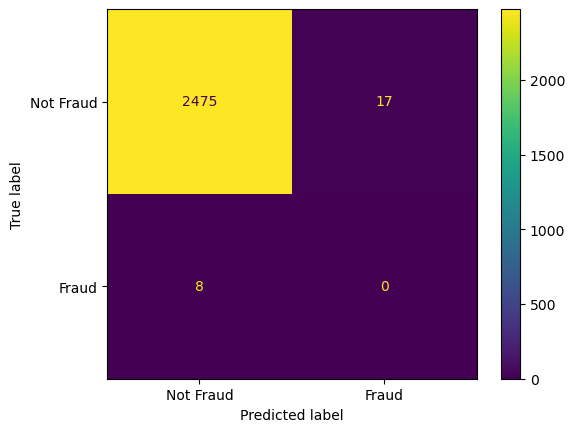

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=['Not Fraud', 'Fraud']).plot()

In [48]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.99
